In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Spinning wheel

Part 0 analysis

In [2]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Spinning_wheel/Part_0.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [3]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [4]:
df.head()

,Time_Tag,Channel
0,0,1
1,6401,1
2,17849,1
3,29784,1
4,52462,1


In [5]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [6]:
hv, xv = np.histogram(diffs, bins=1000)

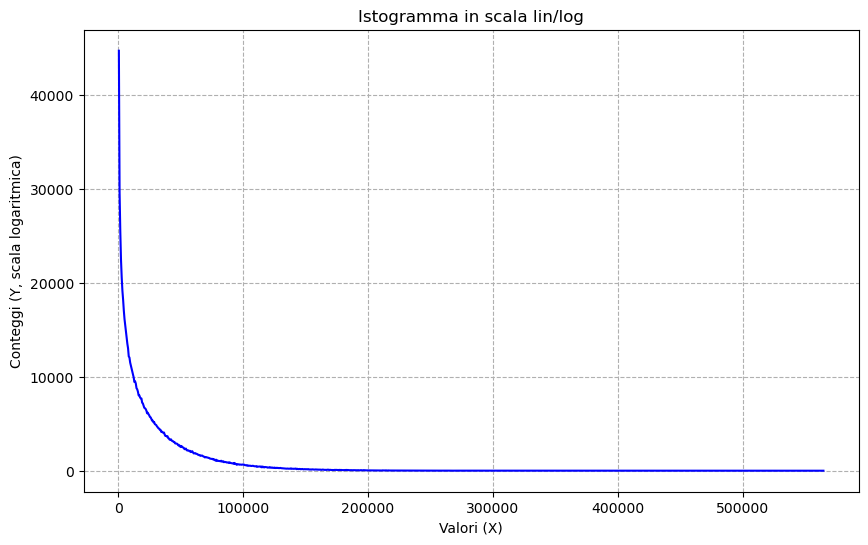

In [7]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

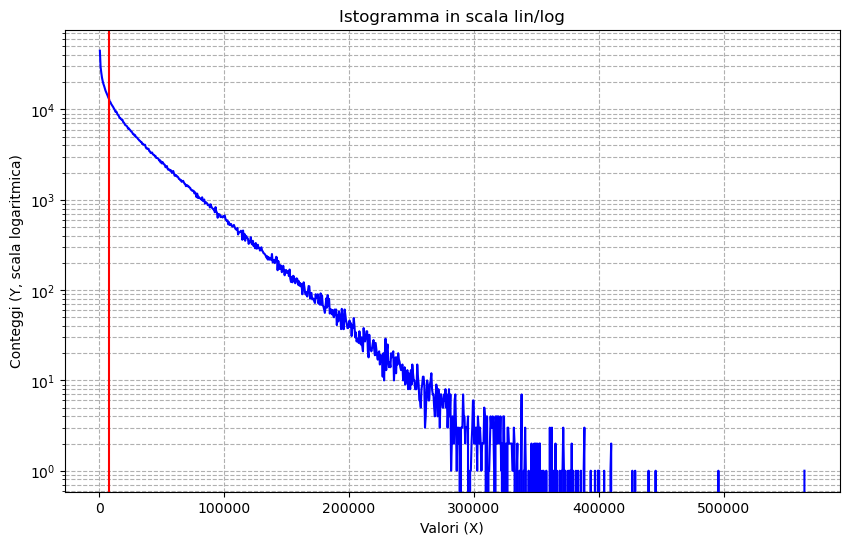

In [8]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=8000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

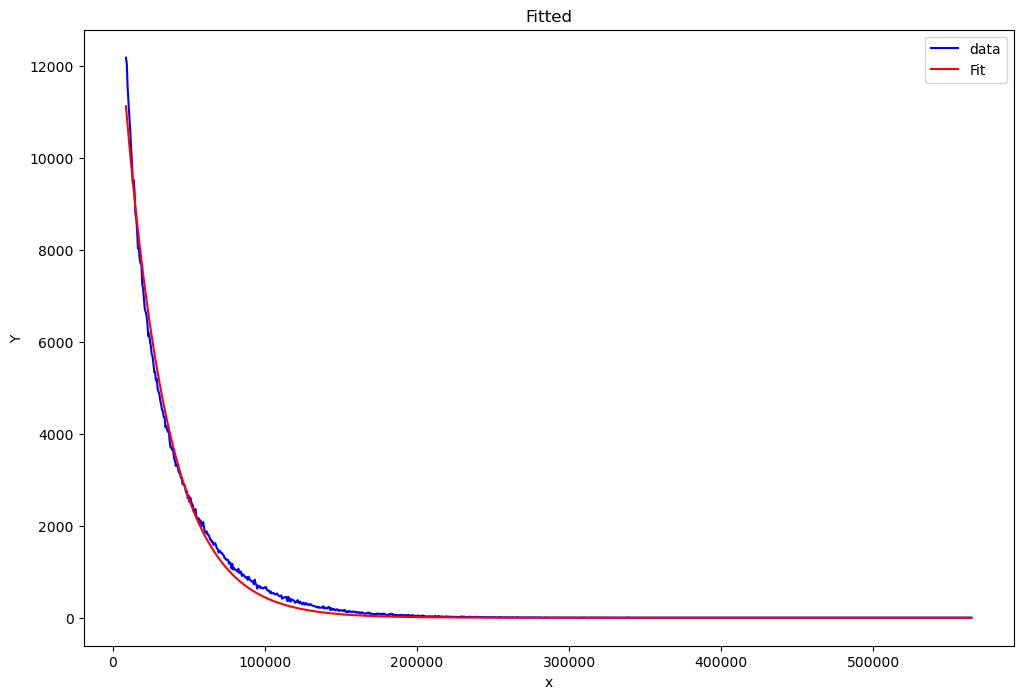

In [9]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[14:]
xv_centers_new = xv_centers[14:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fit')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Fitted')
plt.legend()
plt.show()

In [10]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")


Ampl = 15042.690 +/- 72.565, tau = 28359.551 +/- 146.146


In [11]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

203437


In [12]:
bins = [i * step_time for i in range(N_steps + 1)] 
counts_0_spin, _ = np.histogram(df['Time_Tag'], bins=bins) 

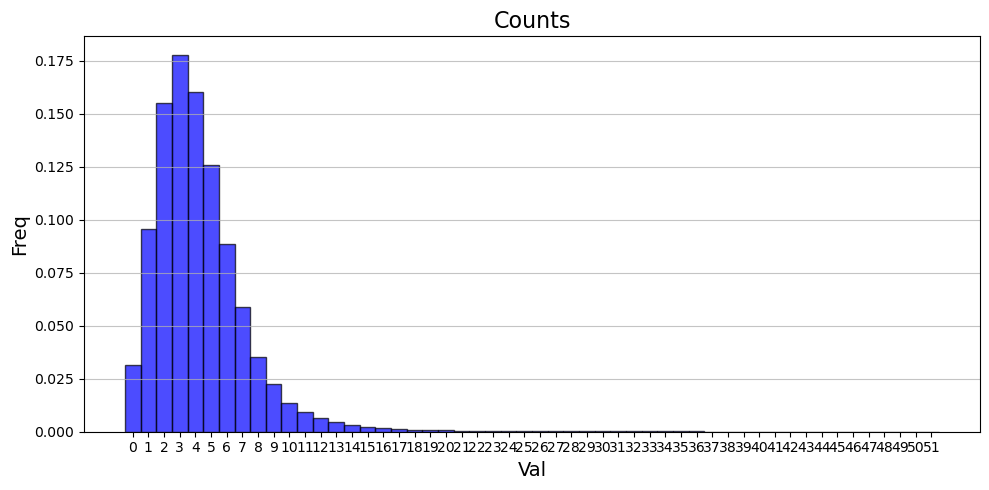

In [13]:
bins_0_spin = np.arange(min(counts_0_spin) - 0.5, max(counts_0_spin) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts_0_spin, bins = bins_0_spin, density=True, color='blue', edgecolor='black', alpha=0.7)

plt.title('Counts', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Freq', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.xticks(range(min(counts_0_spin), max(counts_0_spin) + 1)) 
plt.tight_layout()
plt.show()

Part 1 analysis

In [14]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Spinning_wheel/Part_1.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [15]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [16]:
df.head()

,Time_Tag,Channel
0,0,1
1,15039,1
2,88022,1
3,110723,1
4,120495,1


In [17]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

174165


In [18]:
bins = [i * step_time for i in range(N_steps + 1)]  # Crea N_steps + 1 intervalli
counts, _ = np.histogram(df['Time_Tag'], bins=bins)  # Usa np.histogram per contare le occorrenze

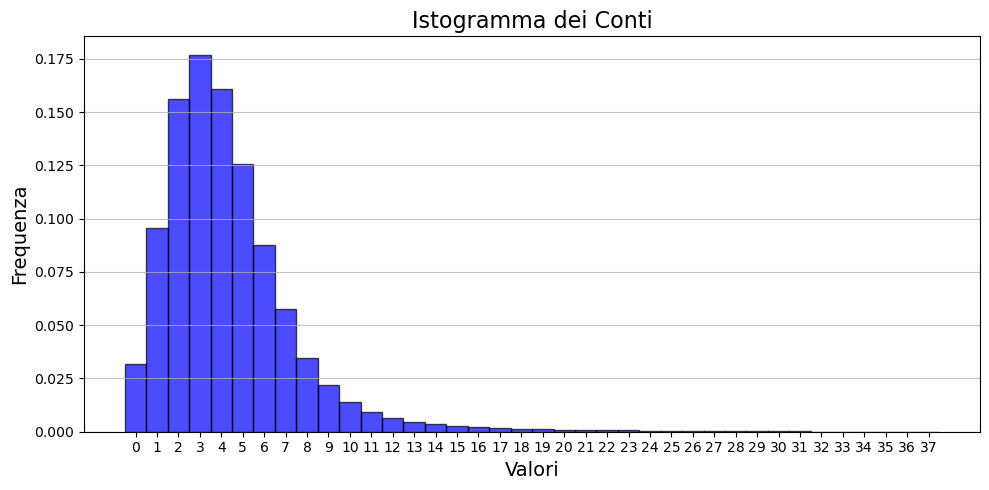

In [19]:
bins = np.arange(min(counts) - 0.5, max(counts) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts, bins = bins, density=True, color='blue', edgecolor='black', alpha=0.7)

# Aggiunta di titolo e etichette
plt.title('Istogramma dei Conti', fontsize=16)
plt.xlabel('Valori', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

plt.grid(axis='y', alpha=0.75)

# Mostra l'istogramma
plt.xticks(range(min(counts), max(counts) + 1))  # Imposta i tick dell'asse X sui numeri interi
plt.tight_layout()
plt.show()

In [20]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [21]:
hv, xv = np.histogram(diffs, bins=1000)

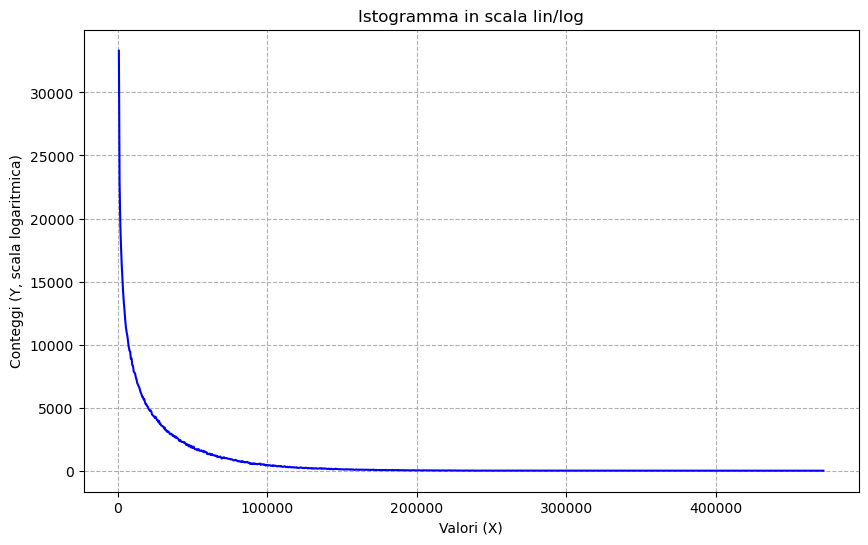

In [22]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

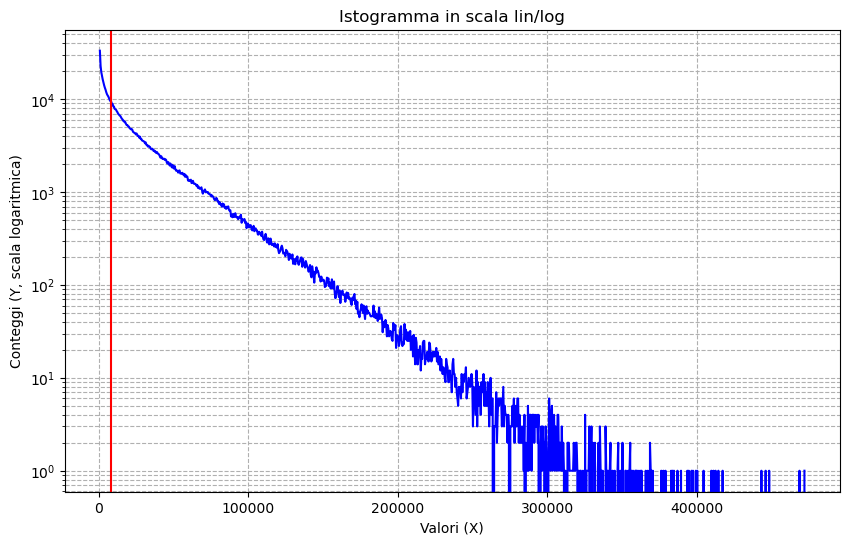

In [23]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=8000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

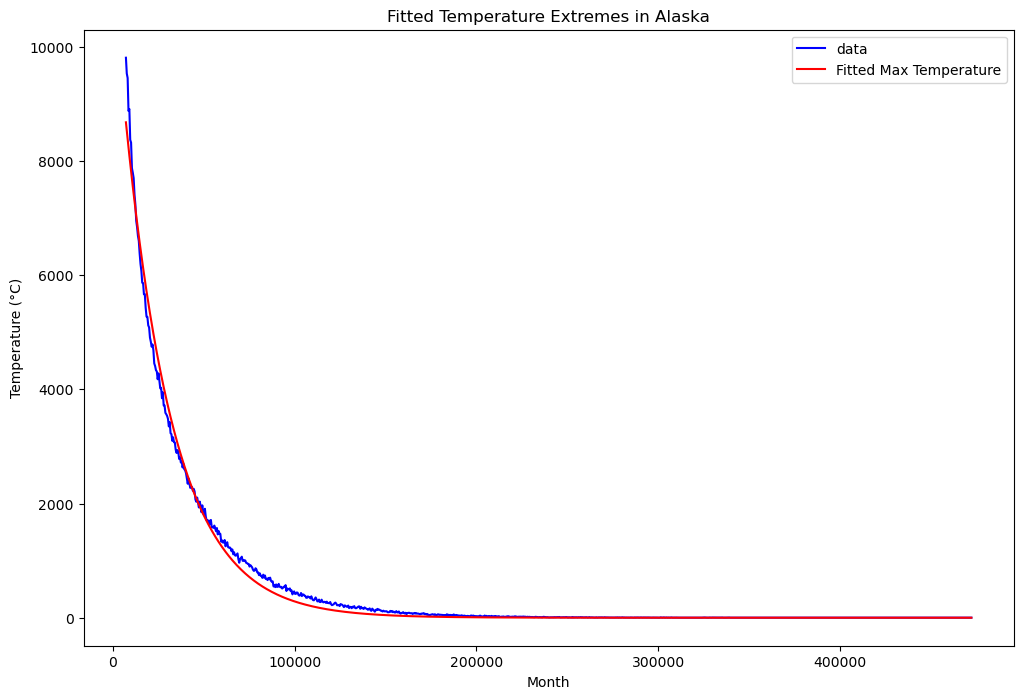

In [24]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[14:]
xv_centers_new = xv_centers[14:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [25]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 11311.476 +/- 60.708, tau = 27164.610 +/- 160.768


Part 2 analysis

In [26]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Spinning_wheel/Part_2.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [27]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [28]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

225332


In [29]:
bins = [i * step_time for i in range(N_steps + 1)]  # Crea N_steps + 1 intervalli
counts, _ = np.histogram(df['Time_Tag'], bins=bins)  # Usa np.histogram per contare le occorrenze

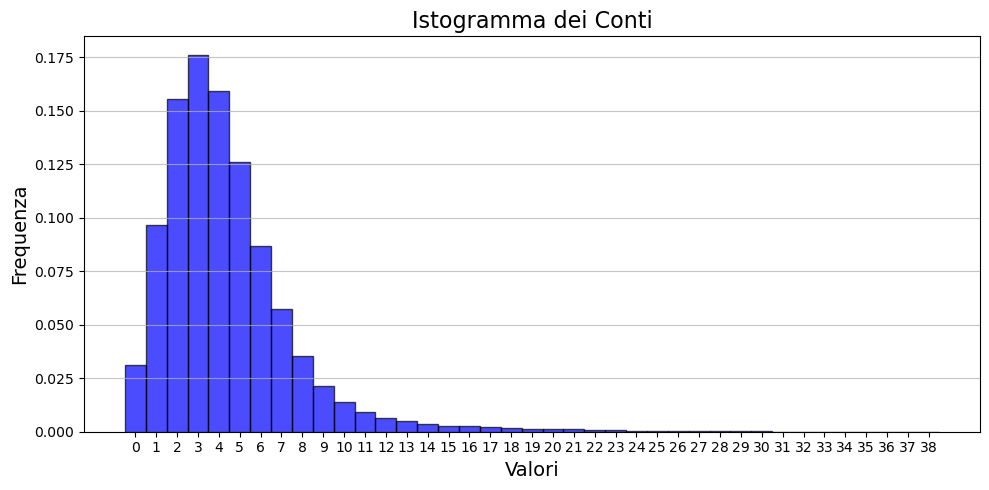

In [30]:
bins = np.arange(min(counts) - 0.5, max(counts) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts, bins = bins, density=True, color='blue', edgecolor='black', alpha=0.7)

# Aggiunta di titolo e etichette
plt.title('Istogramma dei Conti', fontsize=16)
plt.xlabel('Valori', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

plt.grid(axis='y', alpha=0.75)

# Mostra l'istogramma
plt.xticks(range(min(counts), max(counts) + 1))  # Imposta i tick dell'asse X sui numeri interi
plt.tight_layout()
plt.show()

In [31]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [32]:
hv, xv = np.histogram(diffs, bins=1000)

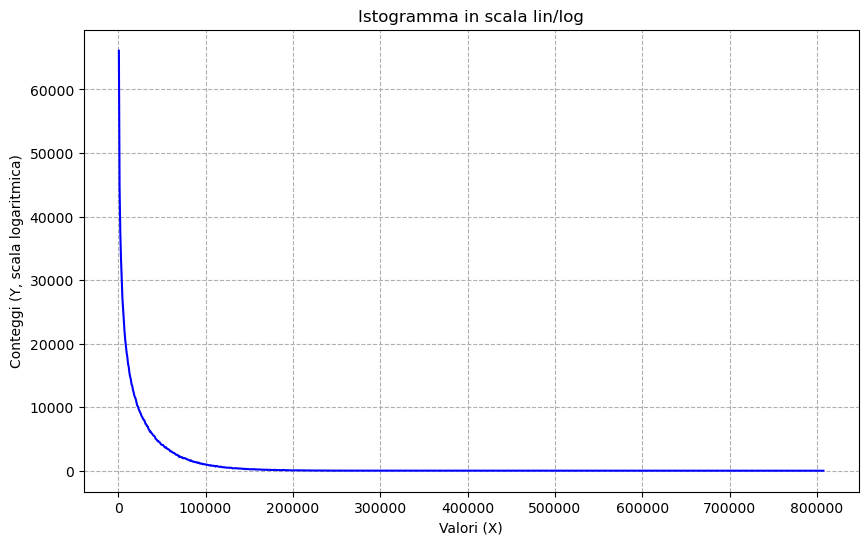

In [33]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

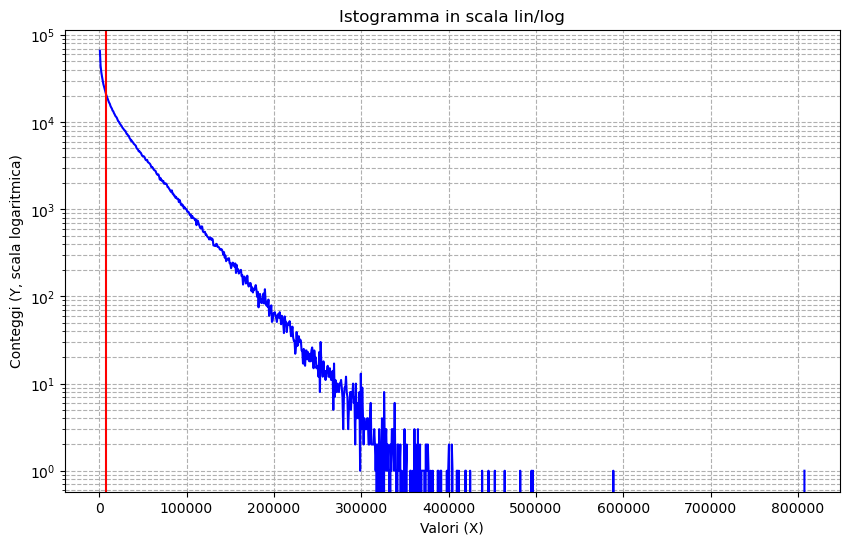

In [34]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=8000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

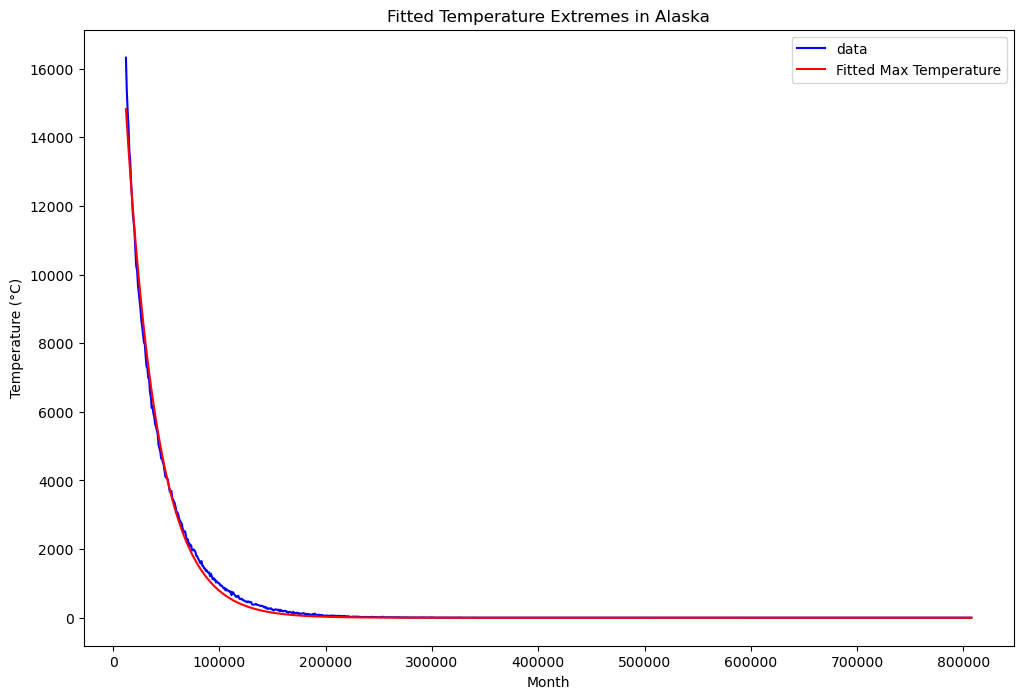

In [35]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[14:]
xv_centers_new = xv_centers[14:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [36]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 22191.034 +/- 111.526, tau = 29904.444 +/- 147.214


## Static wheel

Part 0 analysis

In [37]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_0.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [38]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [39]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

187657


In [40]:
bins = [i * step_time for i in range(N_steps + 1)] 
counts_0_stat, _ = np.histogram(df['Time_Tag'], bins=bins) 

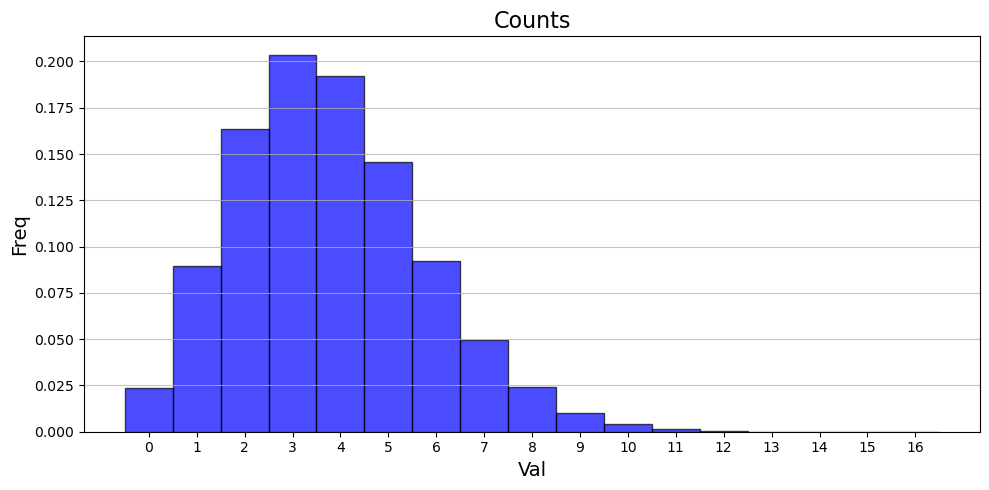

In [41]:
bins_0_stat = np.arange(min(counts_0_stat) - 0.5, max(counts_0_stat) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts_0_stat, bins = bins_0_stat, density=True, color='blue', edgecolor='black', alpha=0.7)

plt.title('Counts', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Freq', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.xticks(range(min(counts_0_stat), max(counts_0_stat) + 1))
plt.tight_layout()
plt.show()

In [42]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [43]:
hv, xv = np.histogram(diffs, bins=1000)

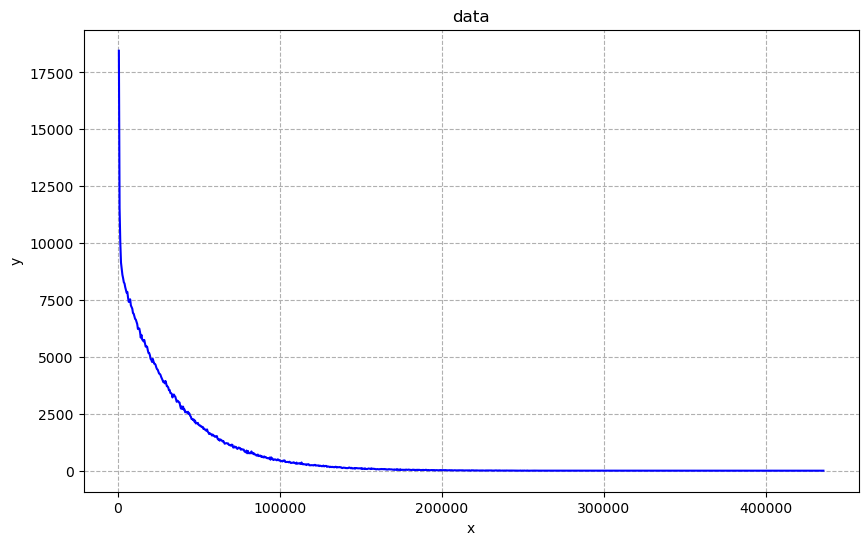

In [44]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("data")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

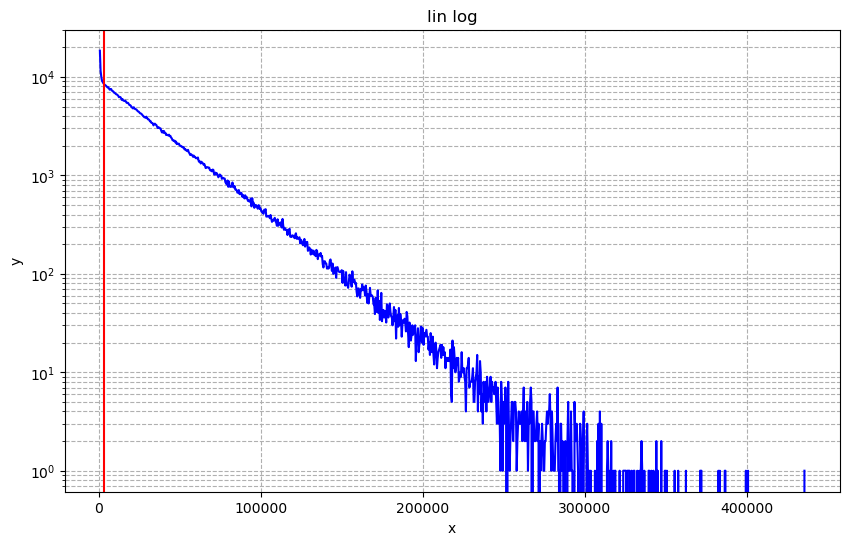

In [45]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=3000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("lin log")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

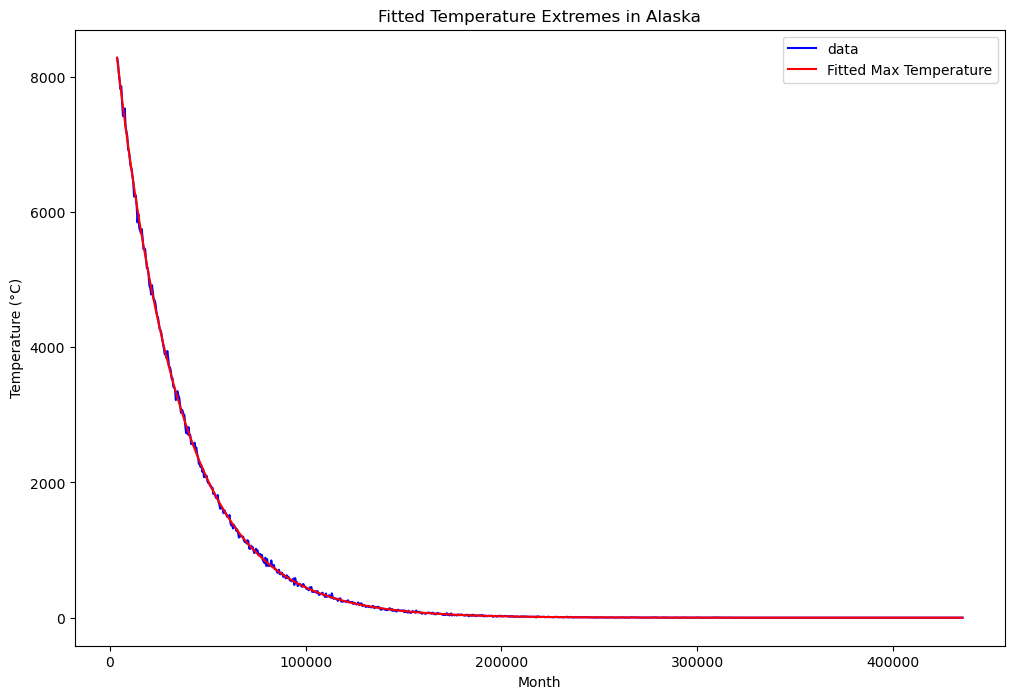

In [46]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[7:]
xv_centers_new = xv_centers[7:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [47]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 9238.332 +/- 7.683, tau = 33049.783 +/- 35.087


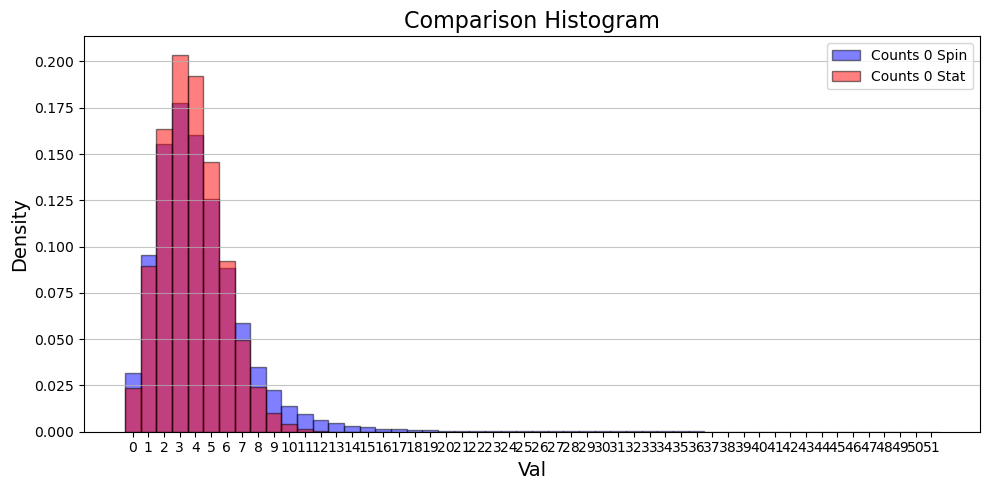

In [48]:
plt.figure(figsize=(10, 5))

plt.hist(counts_0_spin, bins=bins_0_spin, density=True, color='blue', edgecolor='black', alpha=0.5, label='Counts 0 Spin')

plt.hist(counts_0_stat, bins=bins_0_stat, density=True, color='red', edgecolor='black', alpha=0.5, label='Counts 0 Stat')

plt.title('Comparison Histogram', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.legend()

plt.xticks(range(min(min(counts_0_spin), min(counts_0_stat)), max(max(counts_0_spin), max(counts_0_stat)) + 1))
plt.tight_layout()
plt.show()

Part 1 analysis

In [49]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_1.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [50]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [51]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [52]:
hv, xv = np.histogram(diffs, bins=1000)

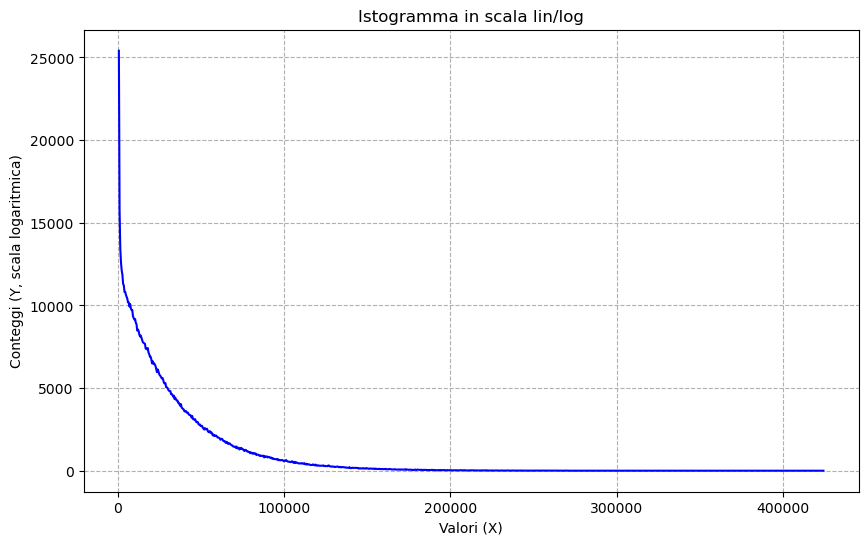

In [53]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

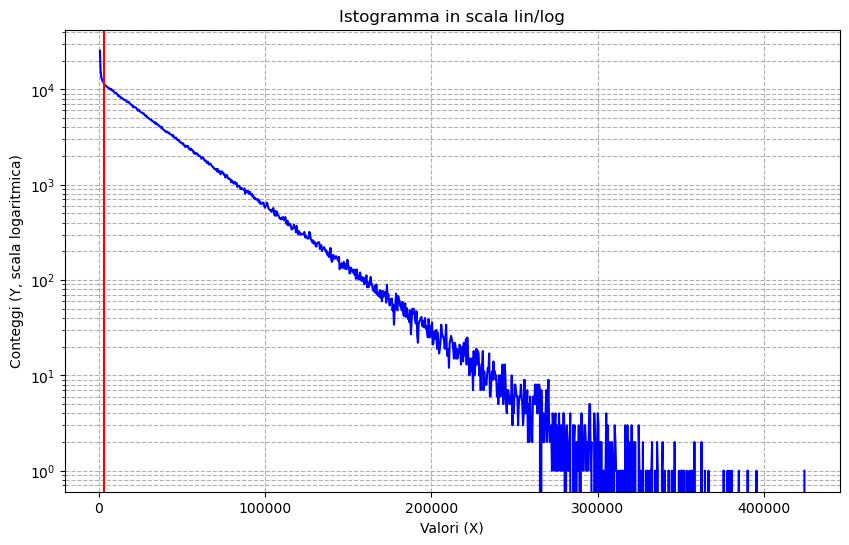

In [54]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=3000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

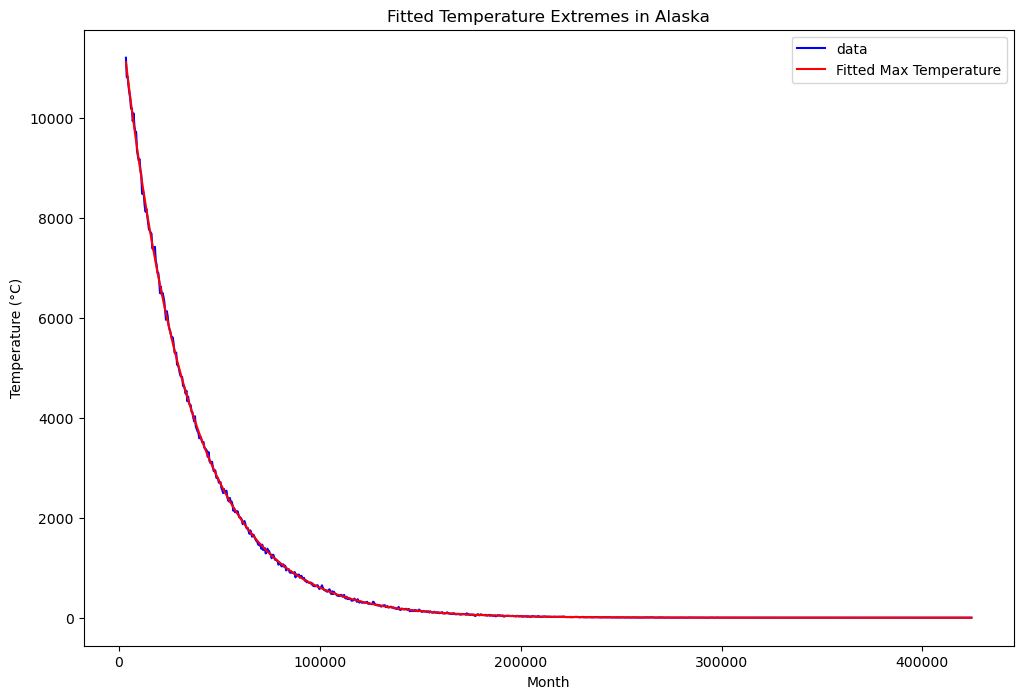

In [55]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[7:]
xv_centers_new = xv_centers[7:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [56]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 12358.895 +/- 8.892, tau = 33108.708 +/- 30.483


Part 2 analysis

In [57]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_2.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [58]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [59]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [60]:
hv, xv = np.histogram(diffs, bins=1000)

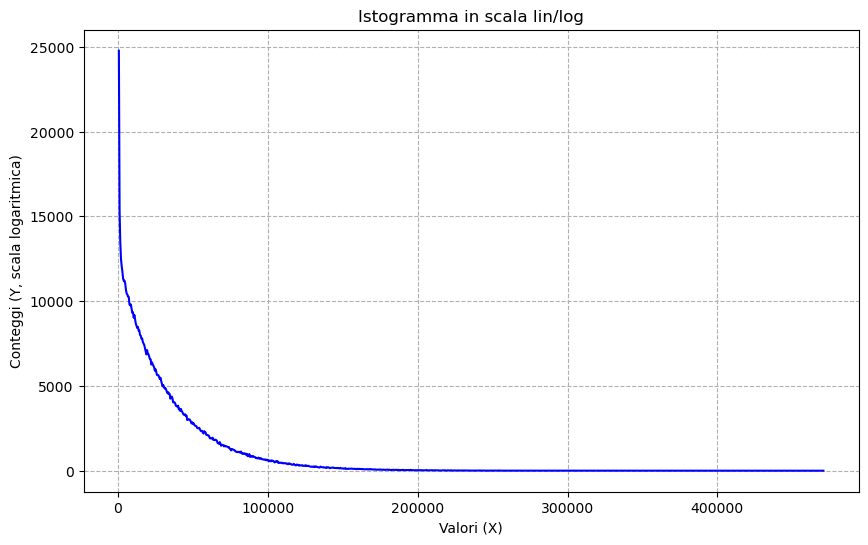

In [61]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

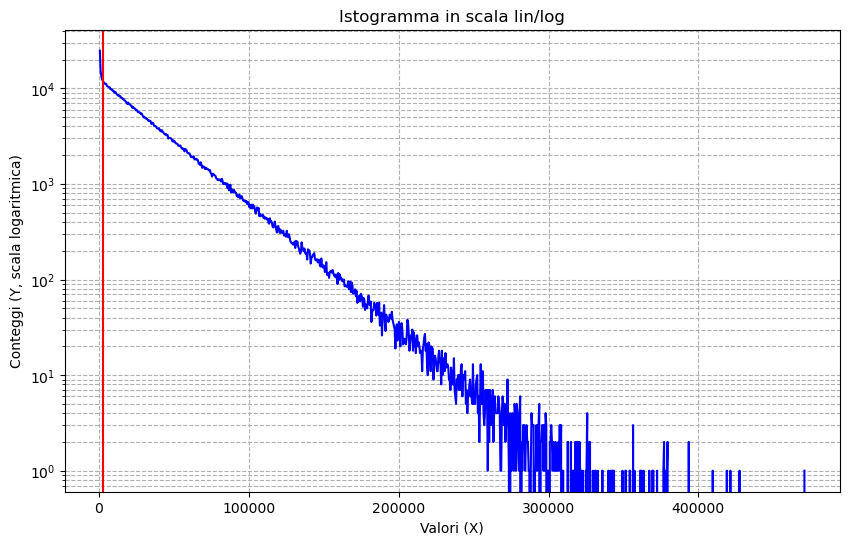

In [62]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=3000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

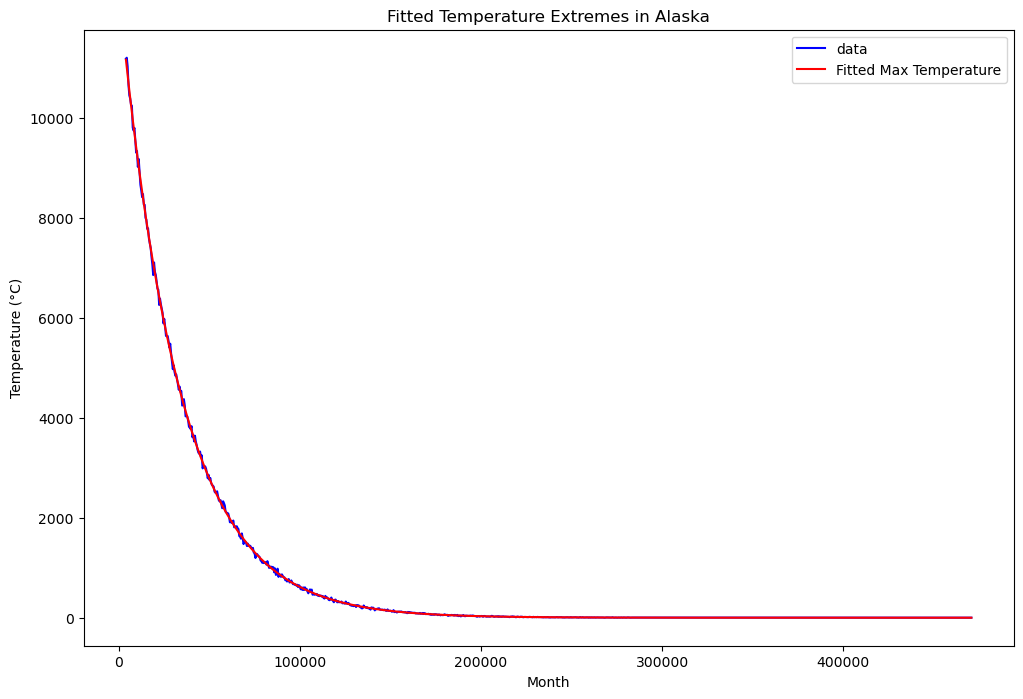

In [63]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[7:]
xv_centers_new = xv_centers[7:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [64]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 12557.533 +/- 10.380, tau = 33158.687 +/- 34.744


In [65]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

237732


In [66]:
bins = [i * step_time for i in range(N_steps + 1)]  # Crea N_steps + 1 intervalli
counts, _ = np.histogram(df['Time_Tag'], bins=bins)  # Usa np.histogram per contare le occorrenze

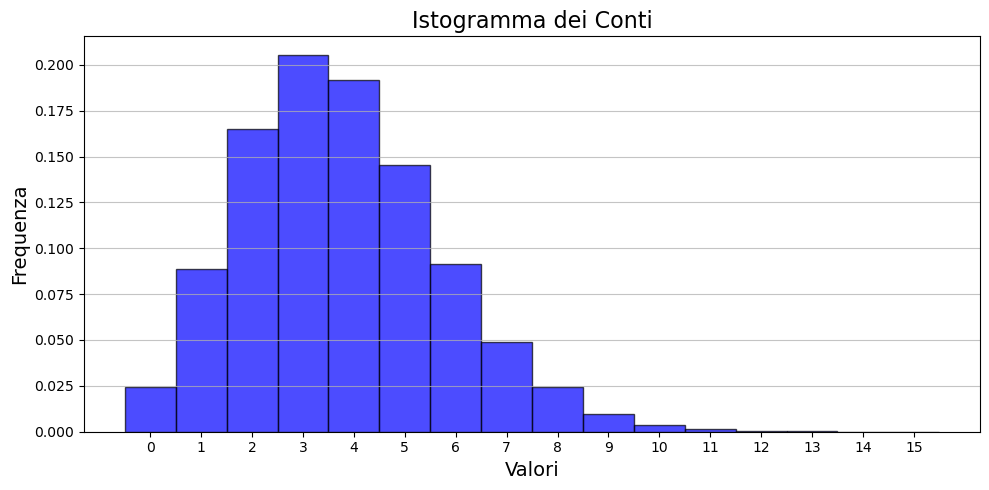

In [67]:
bins = np.arange(min(counts) - 0.5, max(counts) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts, bins = bins, density=True, color='blue', edgecolor='black', alpha=0.7)

# Aggiunta di titolo e etichette
plt.title('Istogramma dei Conti', fontsize=16)
plt.xlabel('Valori', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

plt.grid(axis='y', alpha=0.75)

# Mostra l'istogramma
plt.xticks(range(min(counts), max(counts) + 1))  # Imposta i tick dell'asse X sui numeri interi
plt.tight_layout()
plt.show()